In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import Counter, defaultdict

In [3]:
import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
import pickle

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

*****

## Read data files

- meta data
- raw corpus text
- tokenized text

### raw text data and metadata

In [6]:
with open('../pickle_files/doc_parsed_data.pickle', 'rb') as f:
    doc_data_df = pickle.load(f)
type(doc_data_df),doc_data_df.shape

(pandas.core.frame.DataFrame, (39, 9))

In [7]:
doc_data_df.iloc[18]

hyperlink                                http://saramusik.org/106/textei/
filename                                                          106.txt
author                  أبو بكر محمّد بن يحيى بن صائغ التّجيبي الأندلس...
source                                                  [بريطانيا العظمى]
title_arabic                                كتاب النّفس : القول في السّمع
title_latin_translit                                                 None
tags                    [المدرسة الفارابيّة, الموسيقى والفلسفة, النصوص...
section_titles          [القوّة السّامعة, أَثَرُ الحِسِّ الّذِي فِي ال...
raw_text                (157ب)\nوَالقُوَّةُ السَّامِعَةُ هِيَ اسْتِعْم...
Name: 18, dtype: object

In [8]:
doc_data_df.iloc[19,:]

hyperlink                                http://saramusik.org/120/textei/
filename                                                          120.txt
author                  شمس الدّين أبو عبد اللّه الذّهبي الصّيداوي الد...
source                                           [مصر, مصر, فرنسا, تركيا]
title_arabic                                كتاب الإنعام في معرفة الأنغام
title_latin_translit                                                 None
tags                          [نظريّات موسيقيّة, مدرسة الأراجيز والأنغام]
section_titles          [مقدّمة, فصل حول الأصول, فصل حول الفروع, فصل ح...
raw_text                بِسْمِ اللهِ الرّحْمَانِ الرحِيم وَهْوَ حَسْبُ...
Name: 19, dtype: object

### tokenized corpus

In [9]:
with open('../pickle_files/doc_tokenized_data.pickle', 'rb') as f:
    corpus_tokens = pickle.load(f)
len(corpus_tokens)

39

******

## Calculate document-term matrices

### DTM of raw frequency counts

In [10]:
MIN_DOC_FREQ = 5
MAX_DOC_FREQ = 1.0  #0.7
NGRAM_RANGE = (1,3)

In [11]:
#?CountVectorizer

In [12]:
corpus_tokens_str = [' '.join(doc_tokens) for doc_tokens in corpus_tokens]

In [13]:
count_bow_model = CountVectorizer(min_df=MIN_DOC_FREQ, max_df=MAX_DOC_FREQ, ngram_range=NGRAM_RANGE)

count_bow_matrix = count_bow_model.fit_transform(corpus_tokens_str)
count_bow_vocab = count_bow_model.get_feature_names()
count_bow_matrix.shape,len(count_bow_vocab)

((39, 1258), 1258)

In [14]:
count_bow_matrix.data.min(), count_bow_matrix.data.max()

(1, 377)

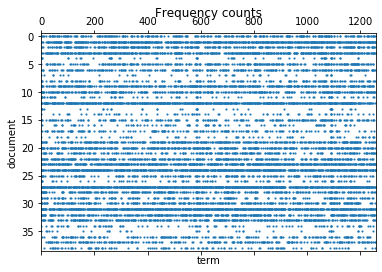

In [15]:
plt.spy(count_bow_matrix,precision=0, markersize=1, aspect='auto')
plt.xlabel('term')
plt.ylabel('document')
fig=plt.title('Frequency counts')

In [16]:
sorted(count_bow_vocab)

['1979',
 '1979 هرس',
 '1979 هرس شلواح',
 '2004',
 'ئتلاف',
 'ابا',
 'ابتد',
 'ابدا',
 'ابراهيم',
 'ابراهيم موصل',
 'ابعاد',
 'ابن',
 'ابو',
 'ابوسليك',
 'ابي',
 'اتت',
 'اتخذ',
 'اتصال',
 'اتفاق',
 'اتفق',
 'اتي',
 'اثار',
 'اثن',
 'اثن عشر',
 'اثني',
 'اجاب',
 'اجتماع',
 'اجزاء',
 'اجسام',
 'اجل',
 'اجناس',
 'احب',
 'احد',
 'احد عشر',
 'احدا',
 'احداهما',
 'احدي',
 'احسن',
 'احمد',
 'احوال',
 'اختلاف',
 'اخذ',
 'اخر',
 'اخري',
 'اخلاق',
 'اخير',
 'ادرك',
 'ادم',
 'اراد',
 'اربع',
 'اربع عشر',
 'اربع غمات',
 'اربعه',
 'ارد',
 'اردت',
 'ارض',
 'ازمن',
 'اسباب',
 'استعمال',
 'اسد',
 'اسرع',
 'اسفل',
 'اسلام',
 'اسم',
 'اسماء',
 'اسمه',
 'اسود',
 'اشار',
 'اشبه',
 'اشد',
 'اشرف',
 'اشعار',
 'اشكال',
 'اشياء',
 'اصابع',
 'اصبع',
 'اصحاب',
 'اصفهان',
 'اصل',
 'اصلا',
 'اصلح',
 'اصله',
 'اصو',
 'اصول',
 'اصول فروع',
 'اضعف',
 'اظهر',
 'اعداد',
 'اعضاء',
 'اعظم',
 'اعلم',
 'اعني',
 'اغان',
 'اغلب',
 'افضل',
 'اقرب',
 'الات',
 'الان',
 'البم',
 'الة',
 'الح',
 'الحس',
 'الحق',
 'الدساتين',
 '

### Term weighting with tfidf

In [17]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True, norm='l2')
tfidf_bow_matrix = tfidf_transformer.fit_transform(count_bow_matrix)
tfidf_bow_vocab = count_bow_vocab
tfidf_bow_matrix.shape

(39, 1258)

In [18]:
tfidf_bow_matrix.data.min(), tfidf_bow_matrix.data.max()

(0.0012003848380326176, 0.7672189722896393)

In [19]:
words_df = (tfidf_bow_matrix>0).sum(axis=0).A.ravel()
words_idf = tfidf_transformer.idf_
words_df.shape, words_idf.shape

((1258,), (1258,))

In [20]:
words_df.min(), words_df.max()

(5, 36)

In [21]:
words_idf.min(), words_idf.max()

(1.077961541469712, 2.8971199848858813)

In [22]:
tfidf_bow_vocab[np.argmin(words_idf)],tfidf_bow_vocab[np.argmax(words_df)]

('شلواح', 'شلواح')

****

### Write BOW matrices to a file

In [23]:
with open('../pickle_files/doc_vector_representation.pickle', 'wb') as f:
    pickle.dump([count_bow_matrix,tfidf_bow_matrix,tfidf_bow_vocab], f)

****

## Exploratory analysis of results

### Distribution of length of vocabulary terms

In [24]:
vocab_word_len_df = pd.Series([len(word) for word in count_bow_vocab], index=count_bow_vocab)
vocab_word_len_df.describe()

count    1258.000000
mean        4.122417
std         1.633273
min         3.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        14.000000
dtype: float64

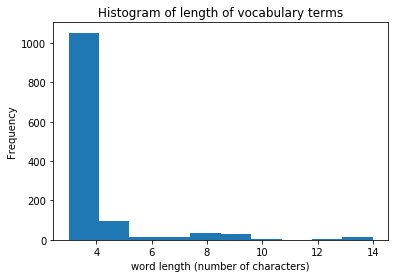

In [25]:
vocab_word_len_df.plot.hist()
plt.xlabel('word length (number of characters)')
fig=plt.title('Histogram of length of vocabulary terms')

In [26]:
(vocab_word_len_df==3).sum(),(vocab_word_len_df>=12).sum()

(446, 16)

In [27]:
vocab_word_len_df[vocab_word_len_df>=12]

1979 هرس شلواح    14
ابراهيم موصل      12
الله دنا محمد     13
الله رحم رحيم     13
الله رحمن رحيم    14
بسم الله رحم      12
بسم الله رحمن     13
دنا محمد واله     13
رضي الله عنه      12
زروكند اصفهان     13
شاء الله عال      12
شلواح 1979 هرس    14
صلي الله وسلم     13
هرس شلواح 1979    14
هرس شلواح 2004    14
وصلي الله دنا     13
dtype: int64

### Distribution of number of vocabulary terms per document

In [28]:
nb_terms_per_doc_df = pd.Series((count_bow_matrix>0).sum(axis=1).A.ravel())
nb_terms_per_doc_df.shape

(39,)

In [29]:
nb_terms_per_doc_df.describe()

count     39.000000
mean     285.205128
std      197.866273
min       37.000000
25%      104.000000
50%      277.000000
75%      373.500000
max      776.000000
dtype: float64

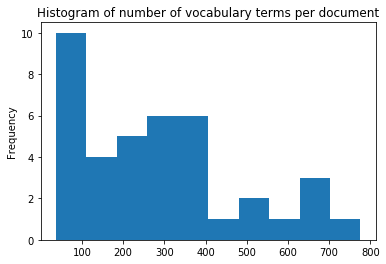

In [30]:
nb_terms_per_doc_df.plot.hist()
fig=plt.title('Histogram of number of vocabulary terms per document')

### Distribution of document frequency of each term

The number of documents that contain each term.

In [31]:
nb_docs_per_term_df = pd.DataFrame({'term':count_bow_vocab, 'doc_frequency':(count_bow_matrix>0).sum(axis=0).A.ravel()})

In [32]:
nb_docs_per_term_df.describe()

,doc_frequency
count,1258.000000
mean,8.841812
std,4.863738
min,5.000000
25%,5.000000
50%,7.000000
75%,10.000000
max,36.000000


In [33]:
## Top 10 terms

nb_docs_per_term_df.sort_values(by='doc_frequency', ascending=False).head(10)

,term,doc_frequency
1090,هرس شلواح,36
1089,هرس,36
583,شلواح,36
0,1979,33
1091,هرس شلواح 1979,33
584,شلواح 1979,33
150,اول,32
1164,وقد,31
111,الله,29
1063,نغم,29


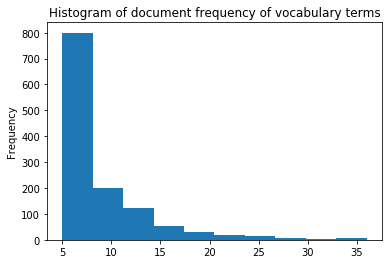

In [34]:
nb_docs_per_term_df.doc_frequency.plot.hist()
fig=plt.title('Histogram of document frequency of vocabulary terms')

### Distribution of total frequency of each term

The total number of occurrences of each term in all documents.

In [35]:
total_term_freq_df = pd.DataFrame({'term':count_bow_vocab, 'total_frequency':count_bow_matrix.sum(axis=0).A.ravel()})

In [36]:
## Top 10 words

total_term_freq_df.sort_values(by='total_frequency', ascending=False).head(10)

,term,total_frequency
812,قال,615
111,الله,509
1063,نغم,472
150,اول,365
263,ثان,300
784,فقال,271
207,بيت,217
273,ثلاث,214
629,صوت,202
269,ثقيل,198


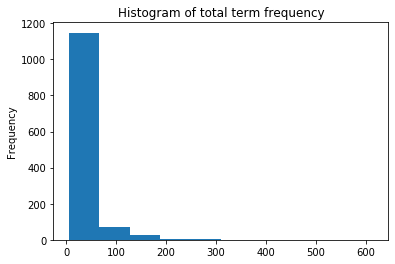

In [37]:
total_term_freq_df.total_frequency.plot.hist()
fig=plt.title('Histogram of total term frequency')

C:\Users\Biware\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


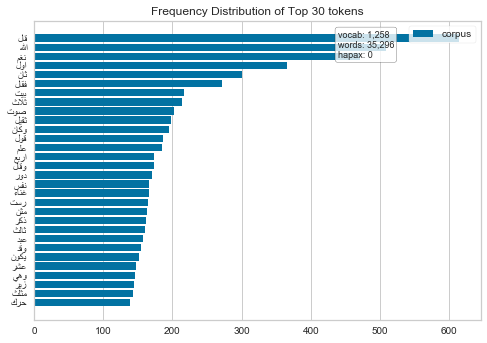

In [38]:
from yellowbrick.text import FreqDistVisualizer

count_bow_vocab_reshaped = [get_display(arabic_reshaper.reshape(word)) for word in count_bow_vocab]
visualizer = FreqDistVisualizer(features=count_bow_vocab_reshaped, n=30)
visualizer.fit(count_bow_matrix)
visualizer.poof()

### Association (MI) between vocabulary terms and tags

- A tag is a manually designated class or category of documents (by domain experts).

- We want to know **which vocabulary terms are most associated with each tag**, i.e. words that tend to occur alot in documents tagged by that tag and not occur otherwise. These terms basically characterize or summarize the content of the corresponding class of documents.

In [39]:
from sklearn.feature_selection import chi2, mutual_info_classif

In [40]:
#chi2(X,y)
#Compute chi-squared stats between each non-negative feature and class
#returns chi2 statistics of each feature in X with respect to the categorical variable in y
#?chi2

In [41]:
from collections import Counter
_ = [y for x in doc_data_df.tags.tolist() for y in x]
L = Counter(_).most_common()
ranked_tags_list = [x[0] for x in L if x[1]>=5]
ranked_tags_list

['المدرسة الأفلاطونيّة المتجدّدة',
 'المدرسة الفارابيّة',
 'مدرسة الأراجيز والأنغام',
 'النّصوص الأدبيّة الخبريّة']

In [42]:
def get_primary_tag(doc_tags):
    for tag in ranked_tags_list:
        if tag in doc_tags:
            return tag
    #return doc_tags[0] if doc_tags else "None"
    return "Other"

doc_data_df['primary_tag'] = doc_data_df.tags.map(get_primary_tag)
doc_data_df.primary_tag.value_counts()

Other                             10
المدرسة الأفلاطونيّة المتجدّدة    10
مدرسة الأراجيز والأنغام            7
المدرسة الفارابيّة                 7
النّصوص الأدبيّة الخبريّة          5
Name: primary_tag, dtype: int64

In [43]:
assert tfidf_bow_matrix.shape[0]==doc_data_df.shape[0]

In [44]:
def process_tag(tag):
    # which documents belong to this tag
    tag_idx = doc_data_df.primary_tag==tag
    print("\n\n%d documents belong to tag %s.\n" %(tag_idx.sum(),tag))
    # mutual information between each vocab term and this tag
    ch,pv = chi2(tfidf_bow_matrix,tag_idx)
    #mi = mutual_info_classif(tfidf_bow_matrix,tag_idx)
    # document frequency of each vocab term in documents of this tag
    nb_docs_per_term = (tfidf_bow_matrix.A[tag_idx,:]>0).sum(axis=0).ravel()
    assert len(nb_docs_per_term)==len(ch)
    # put together in a data frame for visualization purposes
    df = pd.DataFrame({'chi2':ch, 'doc_freq':nb_docs_per_term},index=tfidf_bow_vocab)
    #print(df.corr())
    #print()
    print(df.sort_values(by='chi2',ascending=False).head(10).index.tolist())
    #print(df.sort_values(by='chi2',ascending=False).head(10))
    print()
    #print(df.sort_values(by='mi',ascending=False).head(10))
    #print()
    #sns.pairplot(df)
    #plt.show()
    return df

In [45]:
for tag in doc_data_df.primary_tag.unique():
    _ = process_tag(tag)



10 documents belong to tag المدرسة الأفلاطونيّة المتجدّدة.

['مثن', 'مثلث', 'زير', 'البم', 'خنصر', 'مطلق', 'سباب', 'نفس', 'متوال', 'موسيقار']



10 documents belong to tag Other.

['فقال', 'بيات', 'بعضا', 'طالع', 'قوله', 'محل', 'برد', 'يحدث', 'اجسام', 'اصو']



7 documents belong to tag المدرسة الفارابيّة.

['دور', 'وكل', 'صناف', 'عداد', 'فلسف', 'علم موسيق', 'هواء', 'قدمت', 'مبادئ', 'نفسان']



7 documents belong to tag مدرسة الأراجيز والأنغام.

['رست', 'حسيني', 'انغام', 'عشاق', 'حجاز', 'اصفهان', 'بزرك', 'هبط', 'زنكل', 'رهو']



5 documents belong to tag النّصوص الأدبيّة الخبريّة.

['قال', 'خاتم', 'حدث', 'عني', 'الله موفق', 'بديع', 'نته', 'سرع', 'غناء', 'صواب']



#### Remarks and conclusions

- chi2 is a much better measure of association than mi 
- mi seems to follow document frequency